In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm


In [4]:
train_path = 'data.aug/tc-ts/train'
valid_path = 'data.aug/tc-ts/valid'
test_path = 'data.aug/tc-ts/test'

In [5]:

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['TS', 'TC'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['TS', 'TC'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['TS', 'TC'], batch_size=10, shuffle=False)

Found 2093 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Found 95 images belonging to 2 classes.


In [6]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________

In [7]:
x = mobile.layers[-6].output

In [8]:
output = Dense(units=2, activation='softmax')(x)

In [9]:
model = Model(inputs=mobile.input, outputs=output)

In [11]:
#for layer in model.layers[:-23]:
#    layer.trainable = False
for layer in model.layers[85:]:
    layer.trainable = True
for layer in model.layers[:85]:
    layer.trainable = False
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1 False
3 conv1_bn False
4 conv1_relu False
5 conv_dw_1 False
6 conv_dw_1_bn False
7 conv_dw_1_relu False
8 conv_pw_1 False
9 conv_pw_1_bn False
10 conv_pw_1_relu False
11 conv_pad_2 False
12 conv_dw_2 False
13 conv_dw_2_bn False
14 conv_dw_2_relu False
15 conv_pw_2 False
16 conv_pw_2_bn False
17 conv_pw_2_relu False
18 conv_dw_3 False
19 conv_dw_3_bn False
20 conv_dw_3_relu False
21 conv_pw_3 False
22 conv_pw_3_bn False
23 conv_pw_3_relu False
24 conv_pad_4 False
25 conv_dw_4 False
26 conv_dw_4_bn False
27 conv_dw_4_relu False
28 conv_pw_4 False
29 conv_pw_4_bn False
30 conv_pw_4_relu False
31 conv_dw_5 False
32 conv_dw_5_bn False
33 conv_dw_5_relu False
34 conv_pw_5 False
35 conv_pw_5_bn False
36 conv_pw_5_relu False
37 conv_pad_6 False
38 conv_dw_6 False
39 conv_dw_6_bn False
40 conv_dw_6_relu False
41 conv_pw_6 False
42 conv_pw_6_bn False
43 conv_pw_6_relu False
44 conv_dw_7 False
45 conv_dw_7_bn False
46 conv_dw_7_relu False
47 conv_pw_7 Fal

In [12]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [13]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=20,
            verbose=2
)

Epoch 1/20
210/210 - 609s - loss: 0.7705 - accuracy: 0.5609 - val_loss: 0.7327 - val_accuracy: 0.5556
Epoch 2/20
210/210 - 13s - loss: 0.5874 - accuracy: 0.6942 - val_loss: 0.6688 - val_accuracy: 0.6556
Epoch 3/20
210/210 - 13s - loss: 0.5650 - accuracy: 0.7191 - val_loss: 0.5656 - val_accuracy: 0.7556
Epoch 4/20
210/210 - 13s - loss: 0.5414 - accuracy: 0.7296 - val_loss: 0.5479 - val_accuracy: 0.7667
Epoch 5/20
210/210 - 13s - loss: 0.5197 - accuracy: 0.7391 - val_loss: 0.5322 - val_accuracy: 0.7778
Epoch 6/20
210/210 - 13s - loss: 0.5050 - accuracy: 0.7496 - val_loss: 0.5344 - val_accuracy: 0.7444
Epoch 7/20
210/210 - 13s - loss: 0.4843 - accuracy: 0.7635 - val_loss: 0.5005 - val_accuracy: 0.8111
Epoch 8/20
210/210 - 13s - loss: 0.4860 - accuracy: 0.7625 - val_loss: 0.5527 - val_accuracy: 0.6778
Epoch 9/20
210/210 - 13s - loss: 0.4742 - accuracy: 0.7716 - val_loss: 0.5009 - val_accuracy: 0.7889
Epoch 10/20
210/210 - 13s - loss: 0.4623 - accuracy: 0.7716 - val_loss: 0.5065 - val_accur

In [14]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [15]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
test_batches.class_indices

{'TC': 1, 'TS': 0}

Confusion matrix, without normalization
[[24 11]
 [12 48]]


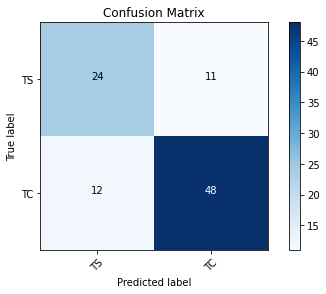

In [18]:
cm_plot_labels = ['TS','TC']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')